In [144]:
#load up modules

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
import datetime
import seaborn as sns

<center><font size="+2">Importing and inspecting the data</font></center>

In [2]:
#import MNIST Dataset

(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [3]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [9]:
y_train[0:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

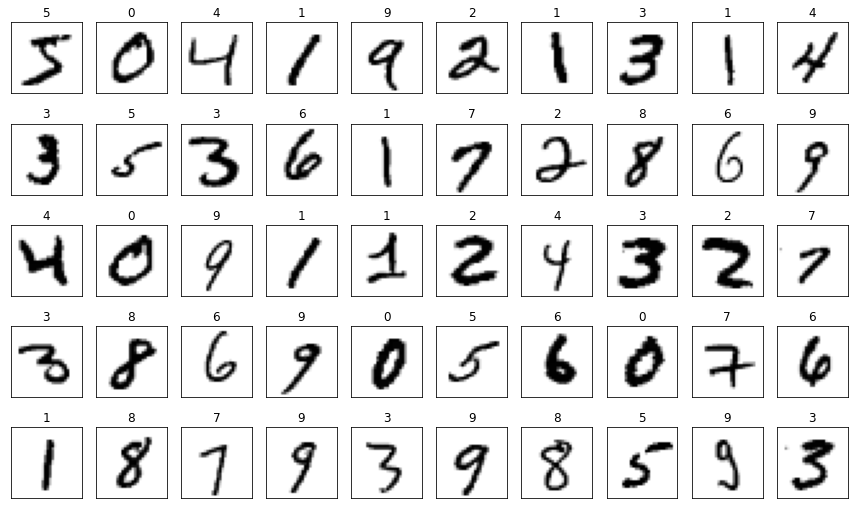

In [17]:
#Plotting images

fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='binary')

In [19]:
#Scaling the data between 0 and 1 for NN

x_train_norm = x_train.astype('float32') / 255
x_test_norm = x_test.astype('float32') / 255

In [27]:
#verifying scaling worked correctly

x_train_norm.max()
x_train_norm.min()

1.0

0.0

In [22]:
#encoding to categorical data

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [24]:
y_train[0:10]
y_train_encoded[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [77]:
# Reshape the images:
x_train_reshaped = x_train_norm.reshape(60000, 784)
x_test_reshaped = x_test_norm.reshape(10000, 784)

x_train_reshaped.shape
x_test_reshaped.shape

(60000, 784)

(10000, 784)

<center><font size="+2">Experiment 1 - 1 Hidden layer, 1 node, 10 output nodes</font></center>

In [189]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [190]:
#setting optimzer and loss function and early callback

optimizer = keras.optimizers.Adam()
loss="categorical_crossentropy"
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [191]:
#compiling the model

model1.compile(loss=loss,
             optimizer=optimizer,
             metrics=["accuracy"])

In [192]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model1.fit(x_train_reshaped, y_train_encoded, epochs=50, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
1407/1407 [==============================] - 1s 811us/step - loss: 2.0637 - accuracy: 0.2003 - val_loss: 1.8050 - val_accuracy: 0.2490
Epoch 2/50
1407/1407 [==============================] - 1s 682us/step - loss: 1.7864 - accuracy: 0.2556 - val_loss: 1.7155 - val_accuracy: 0.2815
Epoch 3/50
1407/1407 [==============================] - 1s 747us/step - loss: 1.7177 - accuracy: 0.2818 - val_loss: 1.6749 - val_accuracy: 0.2881
Epoch 4/50
1407/1407 [==============================] - 1s 716us/step - loss: 1.6846 - accuracy: 0.2920 - val_loss: 1.6534 - val_accuracy: 0.3018
Epoch 5/50
1407/1407 [==============================] - 1s 732us/step - loss: 1.6665 - accuracy: 0.2933 - val_loss: 1.6392 - val_accuracy: 0.3089
Epoch 6/50
1407/1407 [==============================] - 1s 673us/step - loss: 1.6516 - accuracy: 0.3059 - val_loss: 1.6305 - val_accuracy: 0.3122
Epoch 7/50
1407/1407 [==============================] - 1s 737us/step - loss: 1.6435 - accuracy: 0.3102 - val_loss: 1.6203 -

In [193]:
model1.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 785       
_________________________________________________________________
dense_43 (Dense)             (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


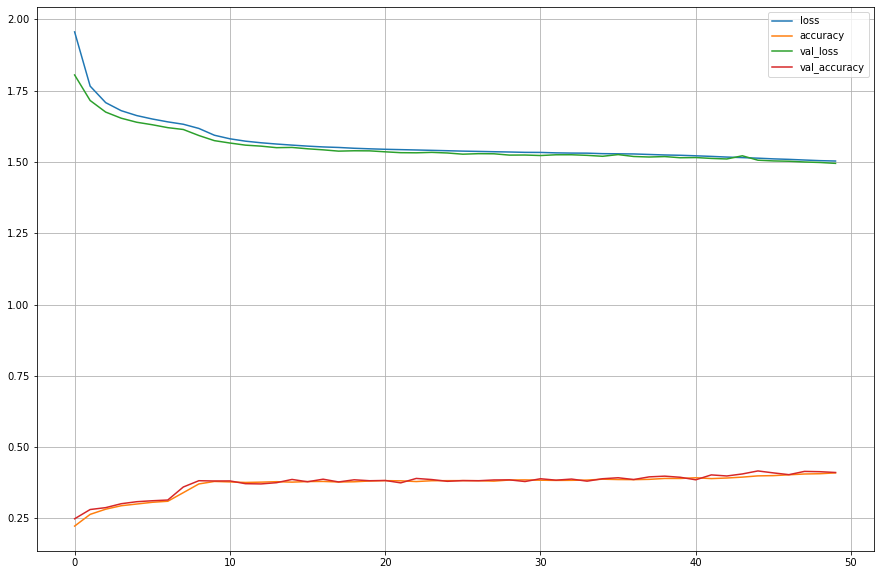

In [194]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.show()

In [195]:
# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model1.predict(x_test_reshaped), axis=-1)
pred_classes

array([7, 6, 1, ..., 7, 3, 6], dtype=int64)

In [196]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [197]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [198]:
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.01%,0.04%,0.00%,0.00%,0.00%,99.96%,0.00%,0.00%
1,0.00%,0.09%,99.91%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,99.93%,0.01%,0.00%,0.00%,0.00%,0.00%,0.03%,0.02%,0.00%
3,99.99%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.73%,0.00%,0.00%,0.00%,0.00%,0.26%
5,0.00%,99.98%,0.00%,0.00%,0.00%,0.00%,0.00%,0.02%,0.00%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.94%,0.00%,0.00%,0.00%,0.00%,0.05%
7,0.00%,0.00%,0.00%,0.05%,0.01%,0.00%,0.00%,0.00%,0.00%,99.94%
8,0.00%,0.00%,0.02%,0.00%,0.00%,0.66%,98.90%,0.00%,0.43%,0.00%
9,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.02%,99.97%


In [199]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Predicted Classes')

Text(0, 0.5, 'Actual Classes')

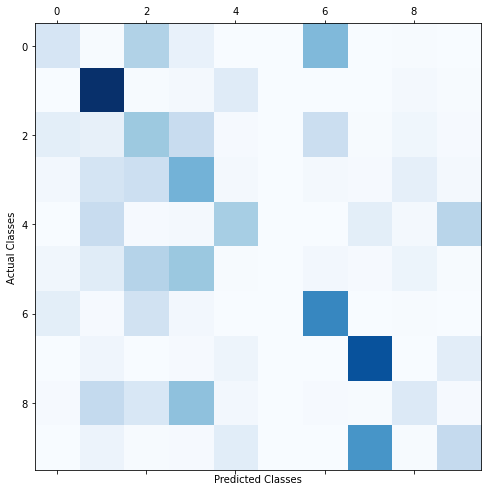

In [200]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [201]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model1.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model1.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 3 layers


In [202]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_reshaped)
hidden_layer_activation = activations[1]
output_layer_activations = activations[2]
hidden_layer_activation.shape  

(60000, 1)

In [203]:
output_layer_activations.shape

(60000, 10)

In [204]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 36.15264129638672


In [205]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[2]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.1079 0.0352 0.2062 0.2066 0.0037 0.199  0.0642 0.     0.1772 0.    ]
The sum of the probabilities is (approximately) 0.9999999403953552


In [216]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,1): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.00,4.000,1.000,9.0,2.000,1.000,3.000,1.000,4.000,3.000,5.000,3.000,6.000,1.000
act_val_0,6.213,7.93,1.534,3.408,0.0,4.299,2.491,5.565,2.752,1.917,3.337,5.951,6.217,15.222,3.291


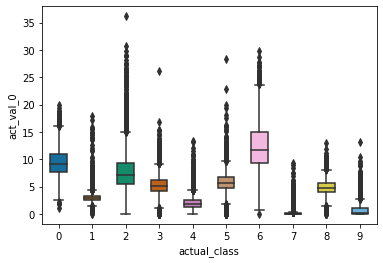

In [217]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

<center><font size="+2">Experiment 2 - 1 Hidden layer, 2 nodes, 10 output nodes</font></center>

In [225]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [226]:
#compiling the model

model2.compile(loss=loss,
             optimizer=optimizer,
             metrics=["accuracy"])

In [227]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model2.fit(x_train_reshaped, y_train_encoded, epochs=100, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/100
1407/1407 [==============================] - 2s 933us/step - loss: 1.7394 - accuracy: 0.3746 - val_loss: 1.3137 - val_accuracy: 0.5592
Epoch 2/100
1407/1407 [==============================] - 1s 754us/step - loss: 1.2838 - accuracy: 0.5734 - val_loss: 1.2052 - val_accuracy: 0.5931
Epoch 3/100
1407/1407 [==============================] - 1s 761us/step - loss: 1.1896 - accuracy: 0.5939 - val_loss: 1.1555 - val_accuracy: 0.6008
Epoch 4/100
1407/1407 [==============================] - 1s 739us/step - loss: 1.1385 - accuracy: 0.6093 - val_loss: 1.0977 - val_accuracy: 0.6351
Epoch 5/100
1407/1407 [==============================] - 1s 732us/step - loss: 1.0954 - accuracy: 0.6305 - val_loss: 1.0564 - val_accuracy: 0.6557
Epoch 6/100
1407/1407 [==============================] - 1s 817us/step - loss: 1.0581 - accuracy: 0.6511 - val_loss: 1.0240 - val_accuracy: 0.6567
Epoch 7/100
1407/1407 [==============================] - 1s 927us/step - loss: 1.0330 - accuracy: 0.6513 - val_loss: 1

In [228]:
model2.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 1570      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


(0.0, 1.0)

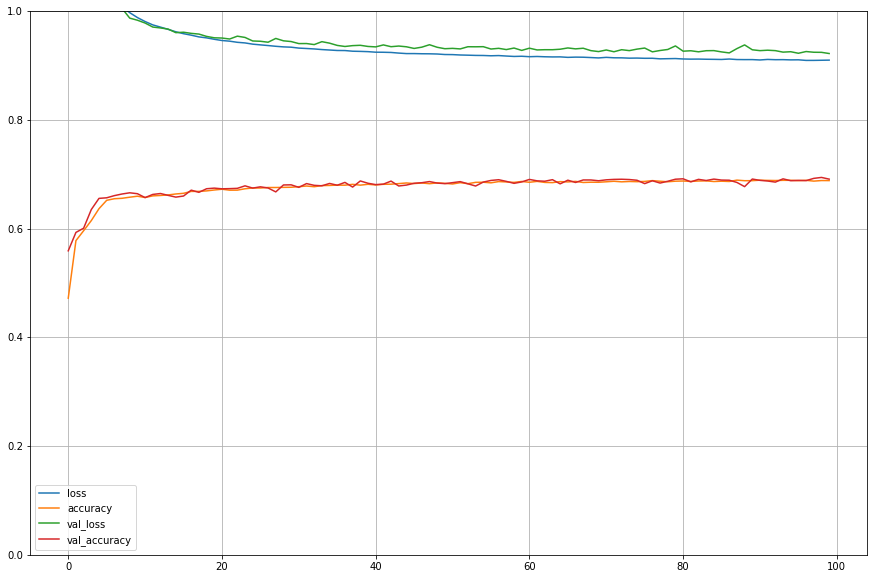

In [229]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [230]:
loss, accuracy = model2.evaluate(x_test_reshaped, y_test_encoded)
print('test set accuracy: ', accuracy)

313/313 [==============================] - 0s 541us/step - loss: 0.9532 - accuracy: 0.6887
test set accuracy:  0.6887000203132629


In [231]:
# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model2.predict(x_test_reshaped), axis=-1)
pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [232]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [233]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [234]:
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.01%,0.04%,0.00%,0.00%,0.00%,99.96%,0.00%,0.00%
1,0.00%,0.09%,99.91%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,99.93%,0.01%,0.00%,0.00%,0.00%,0.00%,0.03%,0.02%,0.00%
3,99.99%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.73%,0.00%,0.00%,0.00%,0.00%,0.26%
5,0.00%,99.98%,0.00%,0.00%,0.00%,0.00%,0.00%,0.02%,0.00%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.94%,0.00%,0.00%,0.00%,0.00%,0.05%
7,0.00%,0.00%,0.00%,0.05%,0.01%,0.00%,0.00%,0.00%,0.00%,99.94%
8,0.00%,0.00%,0.02%,0.00%,0.00%,0.66%,98.90%,0.00%,0.43%,0.00%
9,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.02%,99.97%


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Predicted Classes')

Text(0, 0.5, 'Actual Classes')

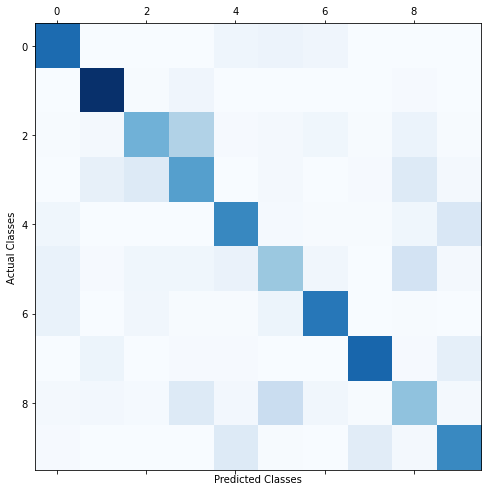

In [235]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [236]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model2.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model2.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 3 layers


In [237]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_reshaped)
hidden_layer_activation = activations[1]
output_layer_activations = activations[2]
hidden_layer_activation.shape  

(60000, 2)

In [238]:
output_layer_activations.shape

(60000, 10)

In [239]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 88.54650115966797


In [240]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[2]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.0041 0.0094 0.0721 0.1998 0.0233 0.2374 0.013  0.     0.4364 0.0045]
The sum of the probabilities is (approximately) 0.9999999403953552


In [241]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,2): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.000,9.000,2.000,1.000,3.000,1.000,4.000,3.000,5.000,3.000,6.000,1.000
act_val_0,4.644,12.330,6.471,0.343,8.026,3.836,0.000,2.399,0.000,9.316,0.257,3.733,0.000,7.996,0.000
act_val_1,6.063,10.141,4.375,2.846,3.992,8.436,0.928,7.821,0.803,5.673,4.935,8.026,7.034,28.625,1.277


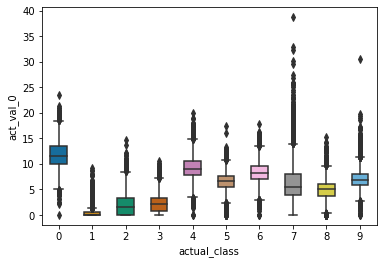

In [242]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

In [73]:
#Not great accuracy and still activation overlap, building another model with additional nodes in the hidden layer

<center><font size="+2">Experiment 3 - 1 Hidden layer, 10 nodes, 10 output nodes</font></center>

In [88]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [89]:
#compiling the model

model3.compile(loss=loss,
             optimizer=optimizer,
             metrics=["accuracy"])

In [90]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model3.fit(x_train_reshaped, y_train_encoded, epochs=100, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/100
1407/1407 [==============================] - 1s 815us/step - loss: 0.9578 - accuracy: 0.7162 - val_loss: 0.3464 - val_accuracy: 0.9010
Epoch 2/100
1407/1407 [==============================] - 1s 684us/step - loss: 0.3432 - accuracy: 0.9010 - val_loss: 0.3195 - val_accuracy: 0.9073
Epoch 3/100
1407/1407 [==============================] - 1s 727us/step - loss: 0.3010 - accuracy: 0.9156 - val_loss: 0.2889 - val_accuracy: 0.9179
Epoch 4/100
1407/1407 [==============================] - 1s 709us/step - loss: 0.2781 - accuracy: 0.9213 - val_loss: 0.2793 - val_accuracy: 0.9243
Epoch 5/100
1407/1407 [==============================] - 1s 708us/step - loss: 0.2611 - accuracy: 0.9267 - val_loss: 0.2749 - val_accuracy: 0.9245
Epoch 6/100
1407/1407 [==============================] - 1s 705us/step - loss: 0.2521 - accuracy: 0.9303 - val_loss: 0.2653 - val_accuracy: 0.9268
Epoch 7/100
1407/1407 [==============================] - 1s 734us/step - loss: 0.2441 - accuracy: 0.9310 - val_loss: 0

In [91]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


(0.0, 1.0)

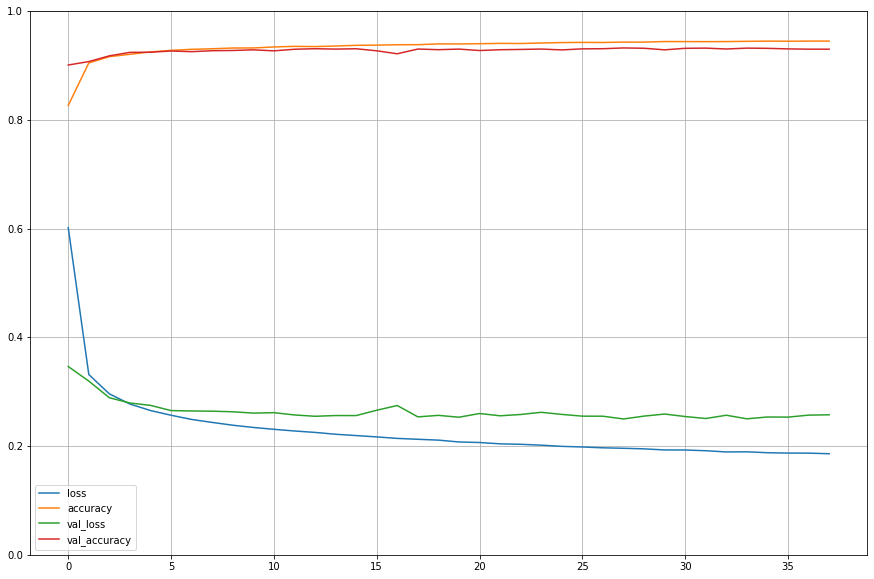

In [92]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [93]:
loss, accuracy = model3.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy)

313/313 [==============================] - 0s 795us/step - loss: 0.2397 - accuracy: 0.9332
test set accuracy:  0.9332000017166138


<center><font size="+2">Experiment 3b - 1 Hidden layer, 20 nodes, 10 output nodes</font></center>

In [117]:
model3b = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [118]:
#compiling the model

model3b.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=["accuracy"])

In [119]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model3b.fit(x_train_reshaped, y_train_encoded, epochs=100, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/100
1407/1407 [==============================] - 2s 873us/step - loss: 0.6960 - accuracy: 0.8077 - val_loss: 0.2793 - val_accuracy: 0.9217
Epoch 2/100
1407/1407 [==============================] - 1s 805us/step - loss: 0.2679 - accuracy: 0.9227 - val_loss: 0.2495 - val_accuracy: 0.9300
Epoch 3/100
1407/1407 [==============================] - 1s 798us/step - loss: 0.2296 - accuracy: 0.9349 - val_loss: 0.2209 - val_accuracy: 0.9391
Epoch 4/100
1407/1407 [==============================] - 1s 795us/step - loss: 0.1958 - accuracy: 0.9435 - val_loss: 0.2006 - val_accuracy: 0.9452
Epoch 5/100
1407/1407 [==============================] - 1s 739us/step - loss: 0.1844 - accuracy: 0.9493 - val_loss: 0.1987 - val_accuracy: 0.9465
Epoch 6/100
1407/1407 [==============================] - 1s 738us/step - loss: 0.1658 - accuracy: 0.9530 - val_loss: 0.2119 - val_accuracy: 0.9431
Epoch 7/100
1407/1407 [==============================] - 1s 742us/step - loss: 0.1549 - accuracy: 0.9553 - val_loss: 0

In [120]:
model3b.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


(0.0, 1.0)

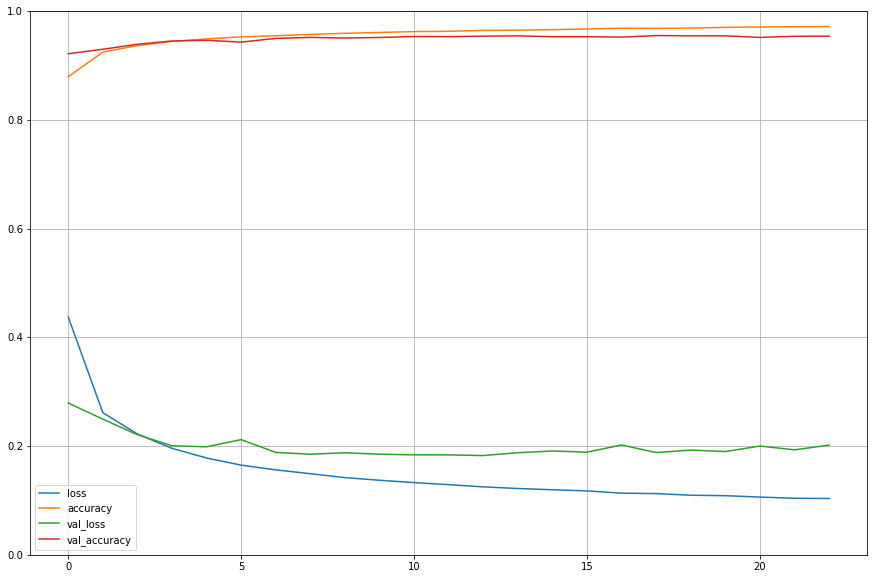

In [121]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [122]:
loss, accuracy = model3b.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy)

313/313 [==============================] - 0s 870us/step - loss: 0.1703 - accuracy: 0.9559
test set accuracy:  0.9559000134468079


<center><font size="+2">Experiment 3c - 1 Hidden layer, 100 nodes, 10 output nodes</font></center>

In [250]:
model3c = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [251]:
#compiling the model

model3c.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=["accuracy"])

In [252]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model3c.fit(x_train_reshaped, y_train_encoded, epochs=100, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/100
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3608 - accuracy: 0.8908 - val_loss: 0.1476 - val_accuracy: 0.9567
Epoch 2/100
1407/1407 [==============================] - 1s 1ms/step - loss: 0.1183 - accuracy: 0.9655 - val_loss: 0.1189 - val_accuracy: 0.9639
Epoch 3/100
1407/1407 [==============================] - 1s 966us/step - loss: 0.0838 - accuracy: 0.9758 - val_loss: 0.1063 - val_accuracy: 0.9674
Epoch 4/100
1407/1407 [==============================] - 1s 1ms/step - loss: 0.0600 - accuracy: 0.9821 - val_loss: 0.1060 - val_accuracy: 0.9667
Epoch 5/100
1407/1407 [==============================] - 1s 1ms/step - loss: 0.0501 - accuracy: 0.9861 - val_loss: 0.0970 - val_accuracy: 0.9723
Epoch 6/100
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0373 - accuracy: 0.9892 - val_loss: 0.1012 - val_accuracy: 0.9711
Epoch 7/100
1407/1407 [==============================] - 1s 1ms/step - loss: 0.0294 - accuracy: 0.9914 - val_loss: 0.1033 - val_

In [253]:
model3c.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


(0.0, 1.0)

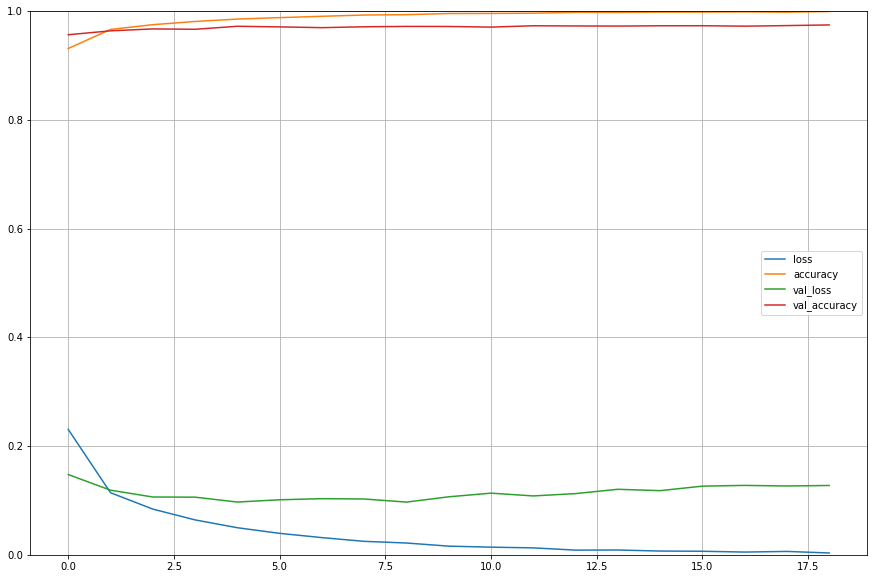

In [254]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [255]:
loss, accuracy = model3c.evaluate(x_test_reshaped, y_test_encoded)
print('test set accuracy: ', accuracy)

313/313 [==============================] - 0s 595us/step - loss: 0.0822 - accuracy: 0.9765
test set accuracy:  0.9764999747276306


In [256]:
preds = model3c.predict(x_test_reshaped)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


<Figure size 864x576 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=0 | pred=7 | true=7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=1 | pred=2 | true=2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=2 | pred=1 | true=1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=3 | pred=0 | true=0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=4 | pred=4 | true=4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=5 | pred=1 | true=1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=6 | pred=4 | true=4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=7 | pred=9 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=8 | pred=5 | true=5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=9 | pred=9 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=10 | pred=0 | true=0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=11 | pred=6 | true=6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=12 | pred=9 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=13 | pred=0 | true=0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=14 | pred=1 | true=1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=15 | pred=5 | true=5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=16 | pred=9 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=17 | pred=7 | true=7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=18 | pred=3 | true=3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=19 | pred=4 | true=4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=20 | pred=9 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=21 | pred=6 | true=6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=22 | pred=6 | true=6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=23 | pred=5 | true=5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=24 | pred=4 | true=4')

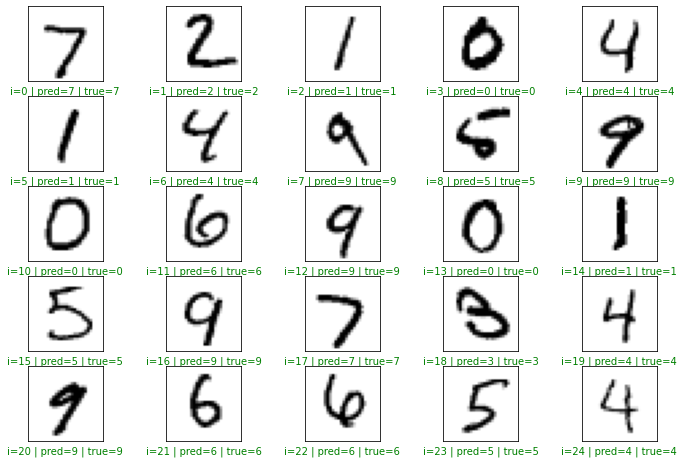

In [257]:
plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

In [258]:
# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model3c.predict(x_test_reshaped), axis=-1)
pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [259]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [260]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [261]:
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%
1,0.00%,0.12%,99.88%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,99.90%,0.00%,0.00%,0.00%,0.00%,0.00%,0.06%,0.03%,0.00%
3,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.93%,0.00%,0.00%,0.00%,0.00%,0.06%
5,0.00%,99.95%,0.00%,0.00%,0.00%,0.00%,0.00%,0.05%,0.00%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.98%,0.00%,0.00%,0.01%,0.00%,0.01%
7,0.00%,0.00%,0.00%,0.06%,0.03%,0.00%,0.00%,0.00%,0.00%,99.91%
8,0.00%,0.00%,29.71%,0.00%,0.00%,42.81%,27.44%,0.00%,0.00%,0.02%
9,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.04%,0.00%,99.95%


In [262]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Predicted Classes')

Text(0, 0.5, 'Actual Classes')

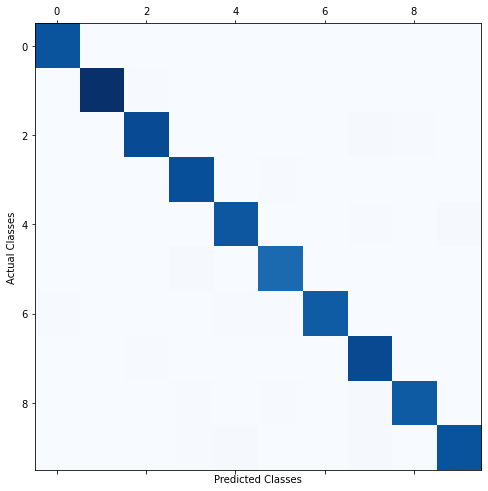

In [263]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [264]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, "4's classified as 4's")

Text(0.5, 1.0, "4's classified as 9's")

Text(0.5, 1.0, "9's classified as 4's")

Text(0.5, 1.0, "9's classified as 9's")

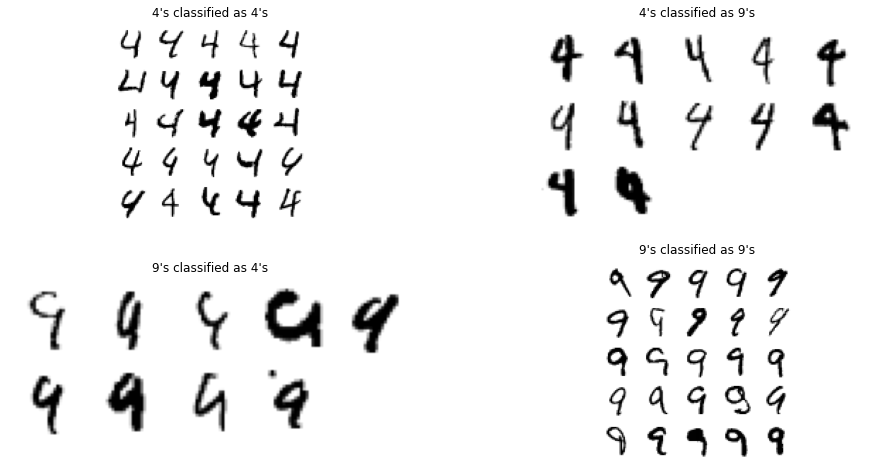

In [265]:
cl_a, cl_b = 4, 9
X_aa = x_test_reshaped[(y_test == cl_a) & (pred_classes == cl_a)]
X_ab = x_test_reshaped[(y_test == cl_a) & (pred_classes == cl_b)]
X_ba = x_test_reshaped[(y_test == cl_b) & (pred_classes == cl_a)]
X_bb = x_test_reshaped[(y_test == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(16,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

In [266]:
#activation values of hidden layers

In [267]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model3c.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model3c.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 3 layers


In [268]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_reshaped)
hidden_layer_activation = activations[1]
output_layer_activations = activations[2]
hidden_layer_activation.shape  

(60000, 100)

In [269]:
output_layer_activations.shape

(60000, 10)

In [270]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 19.950729370117188


In [271]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[2]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.     0.     0.     0.0142 0.     0.9858 0.     0.     0.     0.    ]
The sum of the probabilities is (approximately) 1.0


In [272]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,100): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.000,9.000,2.000,1.000,3.000,1.000,4.000,3.000,5.000,3.000,6.000,1.000
act_val_0,0.000,0.000,0.000,5.625,3.279,2.457,0.000,2.119,0.000,1.816,2.626,1.331,0.000,2.048,0.000
act_val_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
act_val_2,0.000,0.000,1.537,2.731,0.000,0.000,2.052,0.000,1.156,0.000,0.000,0.000,1.799,0.000,2.307
act_val_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
act_val_95,3.433,6.183,0.000,0.000,0.000,0.000,0.000,3.509,0.000,0.000,0.355,0.000,0.000,0.000,0.000
act_val_96,0.000,0.000,0.755,1.426,0.560,0.000,0.000,0.000,0.000,0.000,0.000,2.592,0.000,0.000,0.000
act_val_97,0.715,0.000,0.000,0.314,0.000,0.000,0.000,0.067,0.000,0.000,0.000,1.625,0.000,0.000,0.000
act_val_98,1.367,3.106,0.000,1.531,1.581,0.000,0.000,4.224,0.612,0.000,3.883,0.000,0.000,0.000,0.000


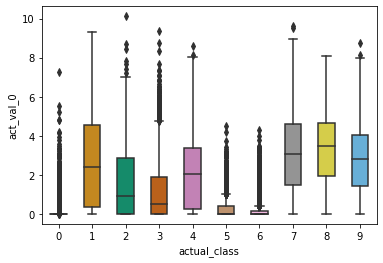

In [273]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

<b> The different classes are much more seperated and the accuracy is much higher than lower nodes </b>

<center><font size="+2">Experiment 4 - PCA</font></center>

In [153]:
pca = PCA()
pca.fit(x_train_reshaped)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

PCA()

In [154]:
#checking 95 percentile cutoff

d

154

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'PCA Curve')

Text(0.5, 0, 'Dimensions')

Text(0, 0.5, 'Explained Variance')

(0.0, 1.0)

(0.0, 822.15)

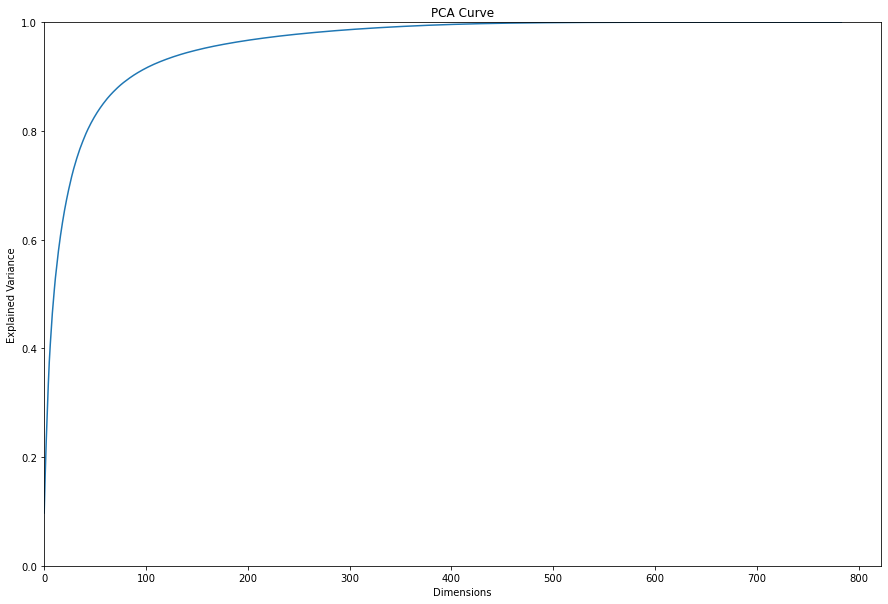

In [155]:
plt.figure(figsize=(15, 10))
plt.plot(cumsum)
plt.title('PCA Curve')
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.ylim(0,1)
plt.xlim(0,)
plt.show()

In [156]:
#creating new dataset representing 95% of explained variance

n_batches=100
inc_pca = IncrementalPCA(n_components=d)
for X_batch in np.array_split(x_train_reshaped, n_batches):
    inc_pca.partial_fit(X_batch)
    
x_reduced_train = inc_pca.transform(x_train_reshaped)
x_reduced_test = inc_pca.transform(x_test_reshaped)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

IncrementalPCA(n_components=154)

In [158]:
x_reduced_train.shape
x_reduced_test.shape

(60000, 154)

(10000, 154)

<b>Fitting the model from experiement 3c with reduced dimensionality dataset</b>

In [159]:
model4 = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [160]:
#compiling the model

model4.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=["accuracy"])

In [161]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model4.fit(x_reduced_train, y_train_encoded, epochs=100, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/100
1407/1407 [==============================] - 1s 848us/step - loss: 0.3921 - accuracy: 0.8843 - val_loss: 0.1500 - val_accuracy: 0.9574
Epoch 2/100
1407/1407 [==============================] - 1s 746us/step - loss: 0.1163 - accuracy: 0.9667 - val_loss: 0.1180 - val_accuracy: 0.9651
Epoch 3/100
1407/1407 [==============================] - 1s 734us/step - loss: 0.0773 - accuracy: 0.9798 - val_loss: 0.1072 - val_accuracy: 0.9673
Epoch 4/100
1407/1407 [==============================] - 1s 748us/step - loss: 0.0588 - accuracy: 0.9846 - val_loss: 0.0973 - val_accuracy: 0.9691
Epoch 5/100
1407/1407 [==============================] - 1s 729us/step - loss: 0.0420 - accuracy: 0.9898 - val_loss: 0.0932 - val_accuracy: 0.9710
Epoch 6/100
1407/1407 [==============================] - 1s 706us/step - loss: 0.0322 - accuracy: 0.9930 - val_loss: 0.0961 - val_accuracy: 0.9722
Epoch 7/100
1407/1407 [==============================] - 1s 736us/step - loss: 0.0235 - accuracy: 0.9948 - val_loss: 0

In [162]:
model4.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 154)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               15500     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1010      
Total params: 16,510
Trainable params: 16,510
Non-trainable params: 0
_________________________________________________________________


(0.0, 1.0)

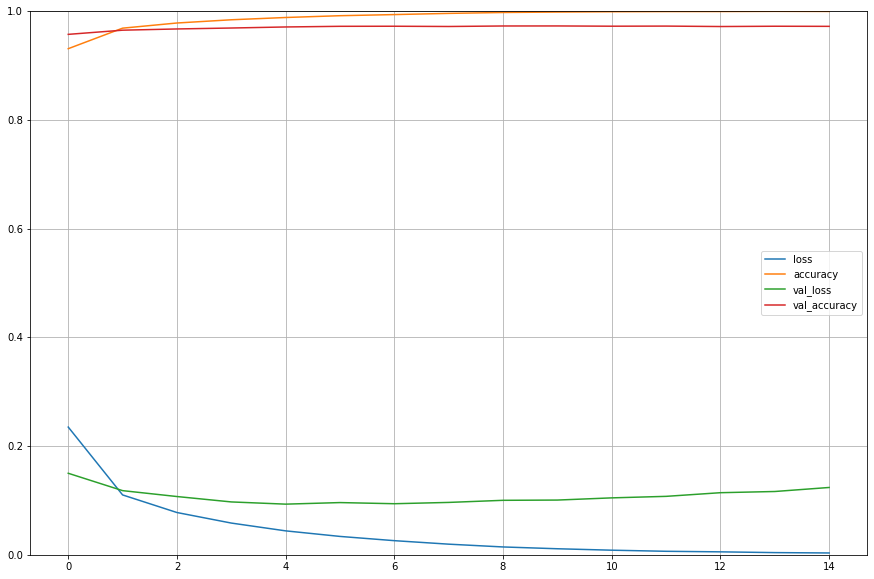

In [163]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [165]:
loss, accuracy = model4.evaluate(x_reduced_test, y_test_encoded)
print('test set accuracy: ', accuracy)

313/313 [==============================] - 0s 485us/step - loss: 0.0816 - accuracy: 0.9753
test set accuracy:  0.9753000140190125


<b> This model performed just slightly below the model in experiement 3c however uses significantly less data </b>

<center><font size="+2">Experiment 5 - Random Forest</font></center>

In [170]:
start = datetime.datetime.now()

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(x_train_reshaped, y_train_encoded)

end = datetime.datetime.now()

print("Total Time: ", end-start)

RandomForestRegressor(random_state=42)

Total Time:  0:22:01.031015


[Text(1, 0, 'Not important'), Text(1, 0, 'Very important')]

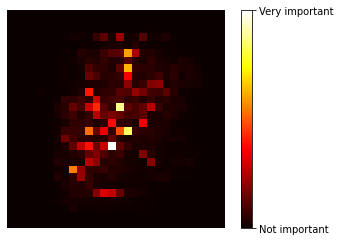

In [171]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

plot_digit(forest.feature_importances_)
cbar = plt.colorbar(ticks=[forest.feature_importances_.min(), forest.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [172]:
n = 70
imp_arr = forest.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [173]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_reshaped[:,idx]
test_images_sm = x_test_reshaped[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 70), (10000, 70))

In [174]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

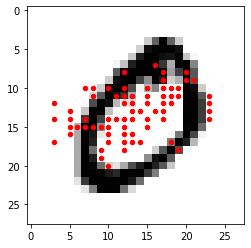

In [175]:
plt.imshow(x_train_reshaped[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

<b>Fitting the model from experiement 3c with reduced dimensionality dataset</b>

In [176]:
model5 = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [177]:
#compiling the model

model5.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=["accuracy"])

In [178]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model5.fit(train_images_sm, y_train_encoded, epochs=100, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/100
1407/1407 [==============================] - 2s 859us/step - loss: 0.5814 - accuracy: 0.8254 - val_loss: 0.3077 - val_accuracy: 0.9080
Epoch 2/100
1407/1407 [==============================] - 1s 736us/step - loss: 0.2933 - accuracy: 0.9120 - val_loss: 0.2599 - val_accuracy: 0.9221
Epoch 3/100
1407/1407 [==============================] - 1s 721us/step - loss: 0.2353 - accuracy: 0.9303 - val_loss: 0.2326 - val_accuracy: 0.9299
Epoch 4/100
1407/1407 [==============================] - 1s 755us/step - loss: 0.2172 - accuracy: 0.9351 - val_loss: 0.2144 - val_accuracy: 0.9363
Epoch 5/100
1407/1407 [==============================] - 1s 764us/step - loss: 0.1952 - accuracy: 0.9417 - val_loss: 0.2037 - val_accuracy: 0.9379
Epoch 6/100
1407/1407 [==============================] - 1s 740us/step - loss: 0.1757 - accuracy: 0.9463 - val_loss: 0.1954 - val_accuracy: 0.9408
Epoch 7/100
1407/1407 [==============================] - 1s 783us/step - loss: 0.1665 - accuracy: 0.9502 - val_loss: 0

In [179]:
model5.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 70)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               7100      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1010      
Total params: 8,110
Trainable params: 8,110
Non-trainable params: 0
_________________________________________________________________


(0.0, 1.0)

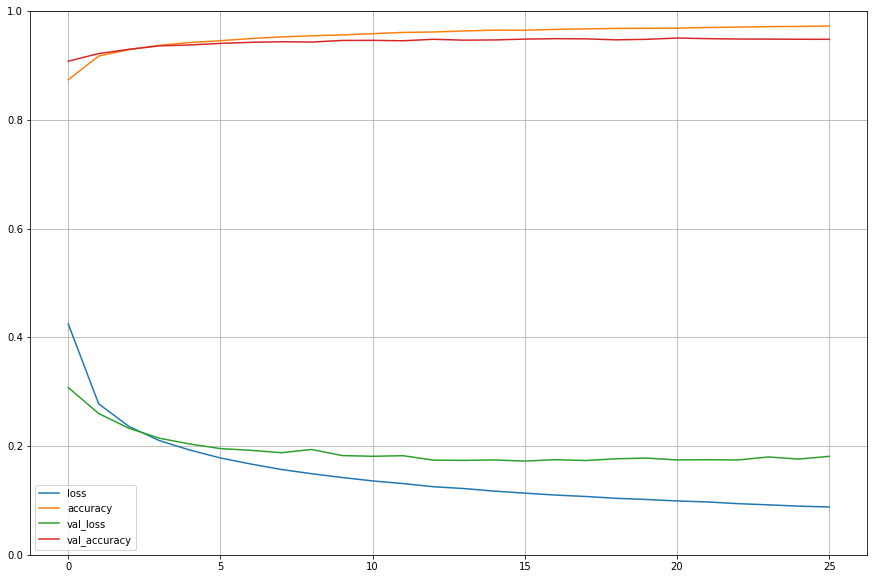

In [180]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [181]:
loss, accuracy = model5.evaluate(test_images_sm, y_test_encoded)
print('test set accuracy: ', accuracy)

313/313 [==============================] - 0s 448us/step - loss: 0.1587 - accuracy: 0.9514
test set accuracy:  0.9513999819755554


<b> Lower accuracy than the PCA model and the full dataset 100 node model </b>